In [10]:
import pandas as pd
import os 

In [11]:
### Merge all CSV files into one file
files = [file for file in os.listdir("./SalesData/")]
processedData = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesData/"+file)
    processedData = pd.concat([processedData, df])

processedData = processedData.dropna(how="all")
processedData = processedData[processedData["Order Date"].str[0:2] != "Or"]
processedData.to_csv("./ProcessedData/Data.csv", index=False)

In [12]:
processedData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Question: What month was the best month for sales? : December

In [13]:
### Read in data frame
allData = pd.read_csv("ProcessedData/Data.csv")

### adds Months and Sales
allData['Month'] = allData['Order Date'].str[0:2]
allData['Month'] = allData['Month'].astype("int16")

allData["Sales"] = allData["Quantity Ordered"] * allData["Price Each"]
results = allData.groupby("Month").sum()

C:\Users\comfy\AppData\Local\Temp\ipykernel_27192\2097216499.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = allData.groupby("Month").sum()


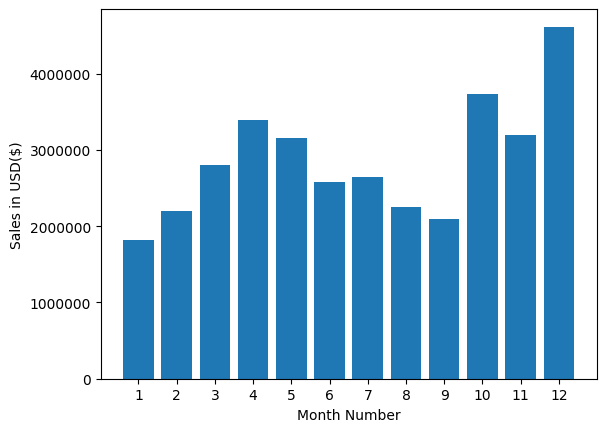

In [14]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results["Sales"])

#Bruh
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel("Month Number")
plt.show()

In [15]:
### Question 2: What city had the highest number of sales: San Francisco

In [34]:
### Read in data frame
allData = pd.read_csv("ProcessedData/Data.csv")

### adds Months and Sales
allData['Month'] = allData['Order Date'].str[0:2]
allData['Month'] = allData['Month'].astype("int16")

allData["Sales"] = allData["Quantity Ordered"] * allData["Price Each"]

In [37]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

allData['City'] = allData["Purchase Address"].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
results = allData.groupby("City").sum()
results

C:\Users\comfy\AppData\Local\Temp\ipykernel_27192\1934339549.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = allData.groupby("City").sum()


,Order ID,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta (GA),3423838407,16602,2779908.20,104794,2795498.58
Austin (TX),2280982185,11153,1809873.61,69829,1819581.75
Boston (MA),4598265261,22528,3637409.77,141112,3661642.01
Dallas (TX),3415643578,16730,2752627.82,104620,2767975.40
Los Angeles (CA),6811084693,33289,5421435.23,208325,5452570.80
New York City (NY),5736333884,27932,4635370.83,175741,4664317.43
Portland (ME),563266345,2750,447189.25,17144,449758.27
Portland (OR),2305594747,11303,1860558.22,70621,1870732.34
San Francisco (CA),10304443952,50239,8211461.74,315520,8262203.91


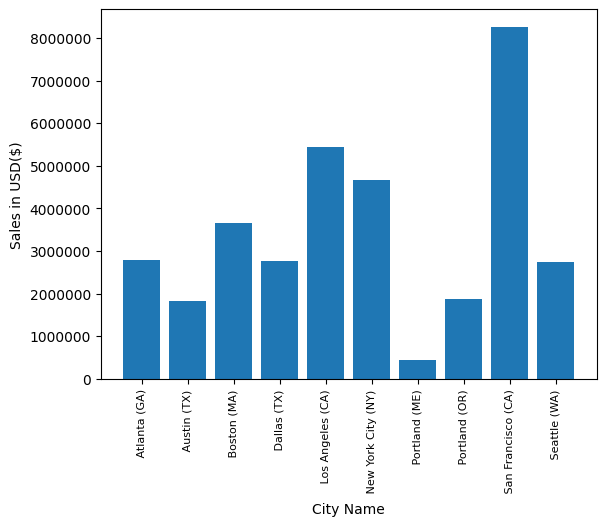

In [40]:
import matplotlib.pyplot as plt

cities = [city for city, df in allData.groupby('City')]

plt.bar(cities, results["Sales"])

#Bruh
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel("Sales in USD($)")
plt.xlabel("City Name")
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customers buying product?

In [41]:
### Read in data frame
allData = pd.read_csv("ProcessedData/Data.csv")

### adds Months and Sales

allData["Order Date"] = pd.to_datetime(allData["Order Date"])

allData["Sales"] = allData["Quantity Ordered"] * allData["Price Each"]

In [47]:
allData["Hour"] = allData["Order Date"].dt.hour
allData["Minute"] = allData["Order Date"].dt.minute

allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",1700.00,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",600.00,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",11.95,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",149.99,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",11.95,12,38


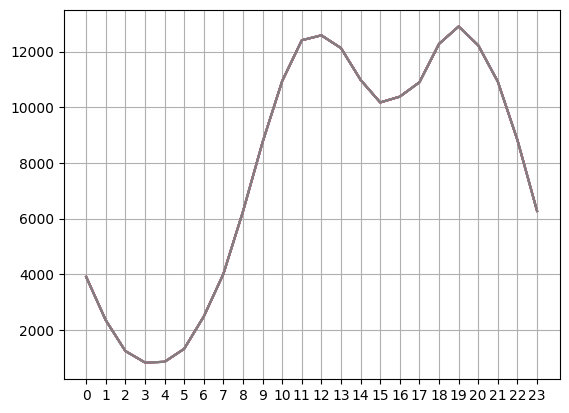

In [51]:
hours = [hour for hour, df in allData.groupby("Hour")]

plt.plot(hours, allData.groupby(["Hour"]).count())
plt.xticks(hours)
plt.grid()
plt.show()

## Potentally around 11pm or 7pm although its hard to fully justify this conclusion with the limited data given

In [ ]:
### What products are most often sold together?

In [53]:
### Read in data frame
allData = pd.read_csv("ProcessedData/Data.csv")

### adds Months and Sales

allData["Order Date"] = pd.to_datetime(allData["Order Date"])

allData["Sales"] = allData["Quantity Ordered"] * allData["Price Each"]

In [61]:
df = allData[allData["Order ID"].duplicated(keep=False)]

df['Grouped'] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))

df = df[["Order ID", "Grouped"]].drop_duplicates()

C:\Users\comfy\AppData\Local\Temp\ipykernel_27192\768879989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


In [63]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

### What product has sold the most

C:\Users\comfy\AppData\Local\Temp\ipykernel_27192\3016723231.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()["Quantity Ordered"]


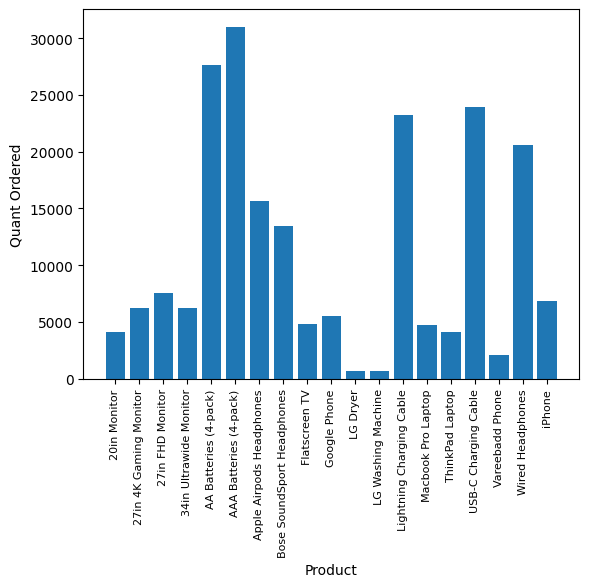

In [68]:
product_group = allData.groupby("Product")
quantity_ordered = product_group.sum()["Quantity Ordered"]

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xlabel("Product")
plt.ylabel("Quant Ordered")
plt.xticks(products, rotation="vertical", size=8)
plt.show()

# The most sold items are typically cheap items which often need to be replaced

C:\Users\comfy\AppData\Local\Temp\ipykernel_27192\894791150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = allData.groupby("Product").mean()["Price Each"]
C:\Users\comfy\AppData\Local\Temp\ipykernel_27192\894791150.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical',size=8)


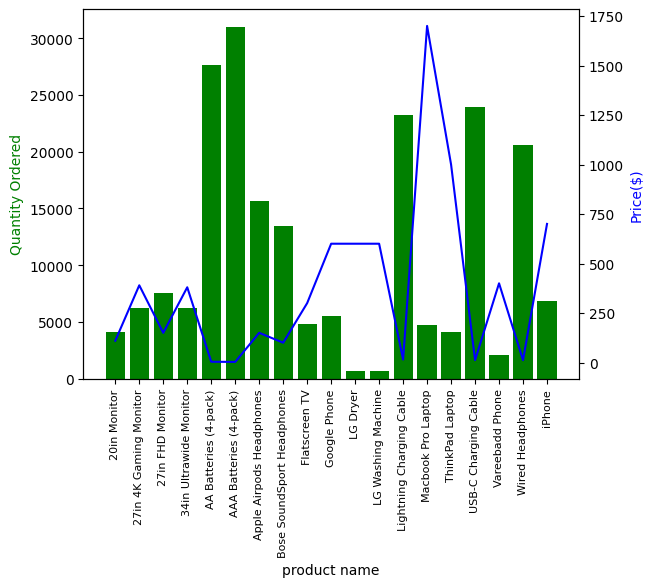

In [79]:
prices = allData.groupby("Product").mean()["Price Each"]
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar (products, quantity_ordered, color="g")
ax2.plot(products, prices, "b-")

ax1.set_xlabel("product name")
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel("Price($)", color='b')
ax1.set_xticklabels(products, rotation='vertical',size=8)
plt.show()

